In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# Choose an audio file and listen to it
# and IPython.display for audio output
import IPython.display

audio_file = "/content/drive/MyDrive/2학기자율/clap_cheer1.mp3"
IPython.display.Audio(filename=audio_file)

In [3]:
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# 스펙트로그램을 생성하는 함수
def generate_spectrogram(audio_path):
    y, sr = librosa.load(audio_path, duration=5)
    S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
    S_dB = librosa.power_to_db(S, ref=np.max)

    plt.figure(figsize=(2, 2))
    librosa.display.specshow(S_dB, sr=sr, x_axis='time', y_axis='mel')
    plt.axis('off')
    plt.tight_layout()

    buf = np.frombuffer(plt.gcf().canvas.tostring_rgb(), dtype=np.uint8)
    img = buf.reshape(plt.gcf().canvas.get_width_height()[::-1] + (3,))
    plt.close()

    img = img / 255.0
    return img

# 파일 경로 설정 및 스펙트로그램 생성
# audio_file = "/content/drive/MyDrive/2학기자율/lawn.mp3"
# audio_file = "/content/drive/MyDrive/2학기자율/태양물고기-6-윤하.mp3"
# audio_file = "/content/drive/MyDrive/2학기자율/혜성-1-윤하.mp3"
audio_file = "/content/drive/MyDrive/2학기자율/혜성-1-윤하_[cut_3sec].mp3"
spectrogram = generate_spectrogram(audio_file)
spectrogram = np.expand_dims(spectrogram, axis=0)

# CNN 모델 정의
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(spectrogram.shape[1], spectrogram.shape[2], 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(5, activation='softmax')  # 다섯 개의 클래스를 위한 출력층
])

# 모델 컴파일
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 모델 예측
predictions = model.predict(spectrogram)
predicted_class = np.argmax(predictions, axis=1)

# 예측 결과 출력
classes = ['박수', '환호', '박수+환호', '노래', '그 외']
print("예측 결과:", predictions)
print("예측된 클래스:", classes[predicted_class[0]])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
예측 결과: [[0.1986884  0.13930427 0.22754738 0.25800472 0.17645524]]
예측된 클래스: 노래


## 비트 변화

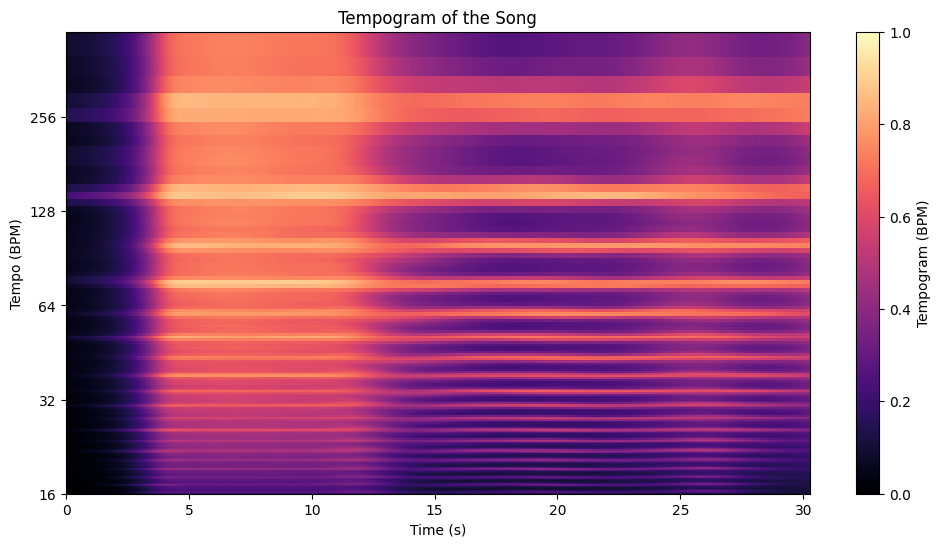

(array([151.99908088]),
 array([0.58049887, 0.9752381 , 1.34675737, 1.7414966 , 2.13623583,
        2.53097506, 2.90249433, 3.29723356, 3.69197279, 4.06349206]))

In [10]:
# Load the audio file and analyze the tempo over time to check for tempo changes.
import librosa
import numpy as np
import matplotlib.pyplot as plt

# Load the audio file
# audio_path = '/content/drive/MyDrive/2학기자율/태양물고기-6-윤하.mp3'
# audio_path = "/content/drive/MyDrive/2학기자율/혜성-1-윤하.mp3"
audio_path = "/content/drive/MyDrive/2학기자율/혜성-1-윤하_[cut_30sec].mp3"
y, sr = librosa.load(audio_path)

# Calculate tempo and beats
onset_env = librosa.onset.onset_strength(y=y, sr=sr)
tempo, beats = librosa.beat.beat_track(onset_envelope=onset_env, sr=sr)

# Convert beat frames to time
beat_times = librosa.frames_to_time(beats, sr=sr)

# Calculate tempogram to analyze tempo changes over time
tempogram = librosa.feature.tempogram(onset_envelope=onset_env, sr=sr)

# Display the tempogram
plt.figure(figsize=(12, 6))
librosa.display.specshow(tempogram, sr=sr, x_axis='time', y_axis='tempo', cmap='magma')
plt.colorbar(label='Tempogram (BPM)')
plt.title('Tempogram of the Song')
plt.xlabel('Time (s)')
plt.ylabel('Tempo (BPM)')
plt.show()

tempo, beat_times[:10]  # Show the initial tempo and first few beat times for reference


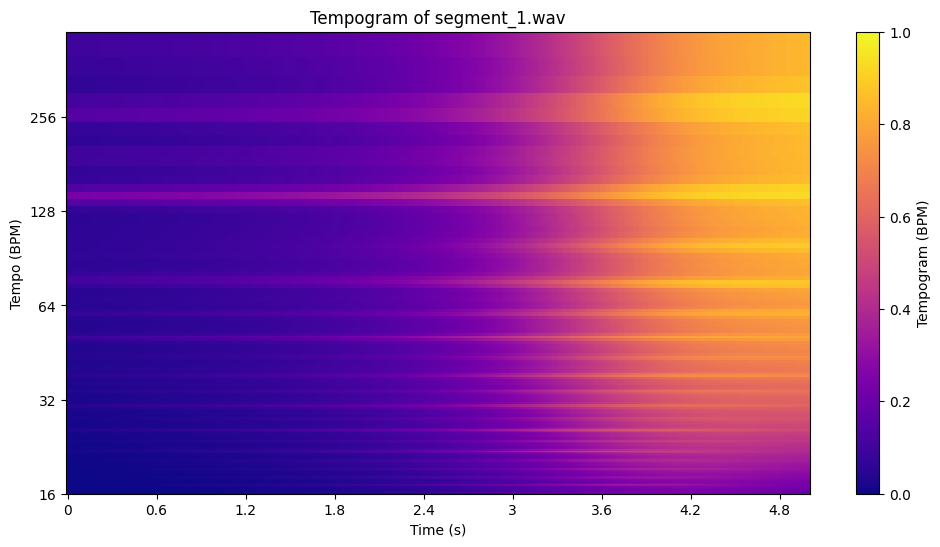

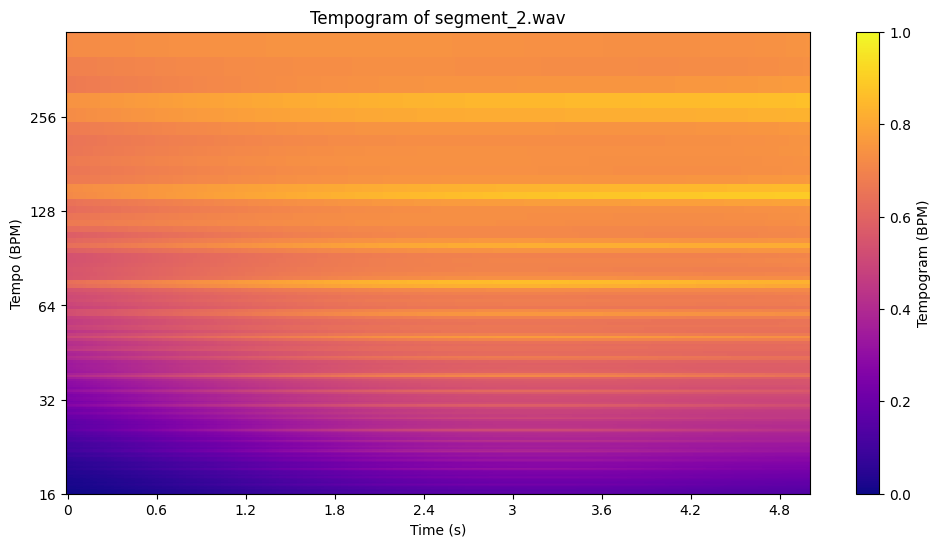

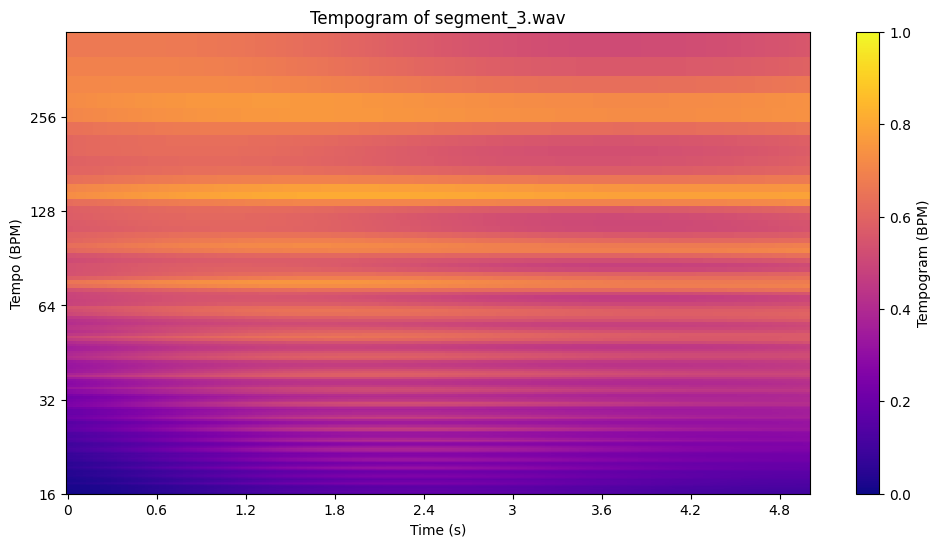

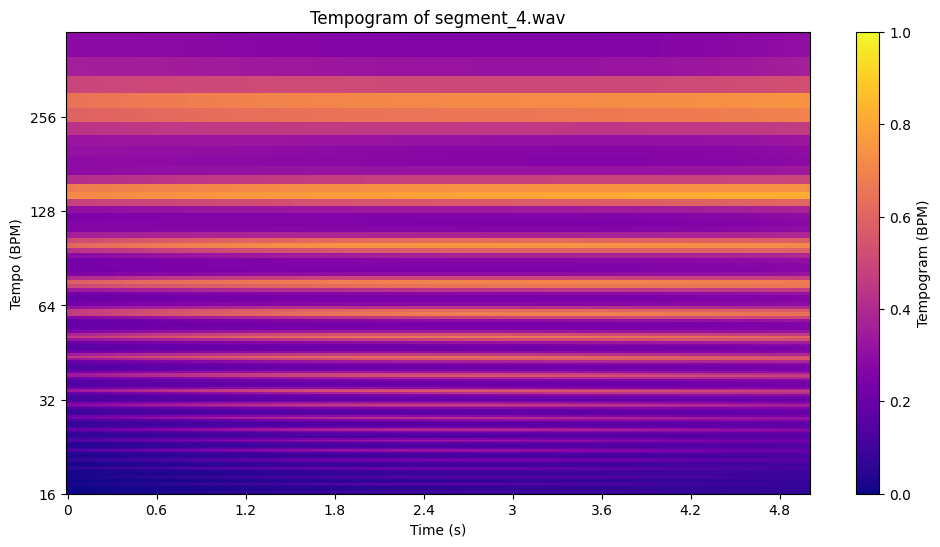

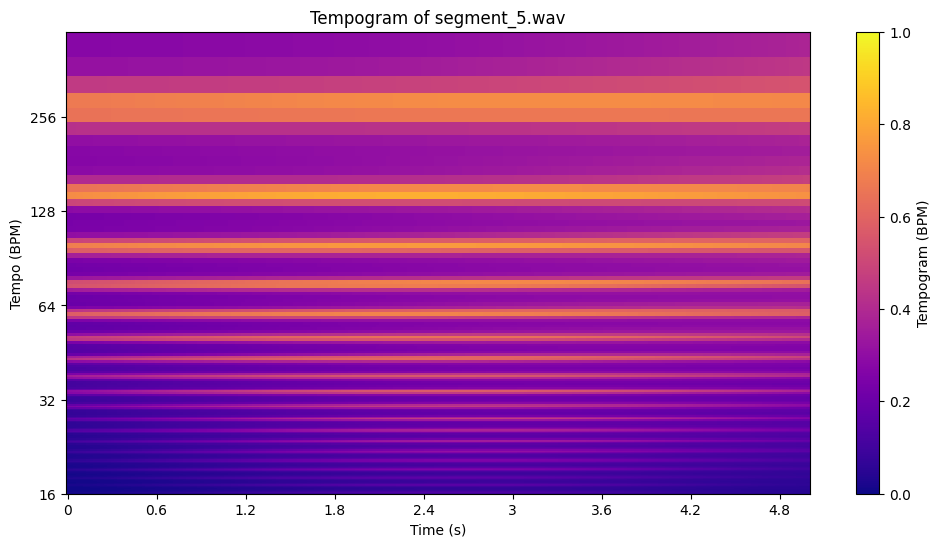

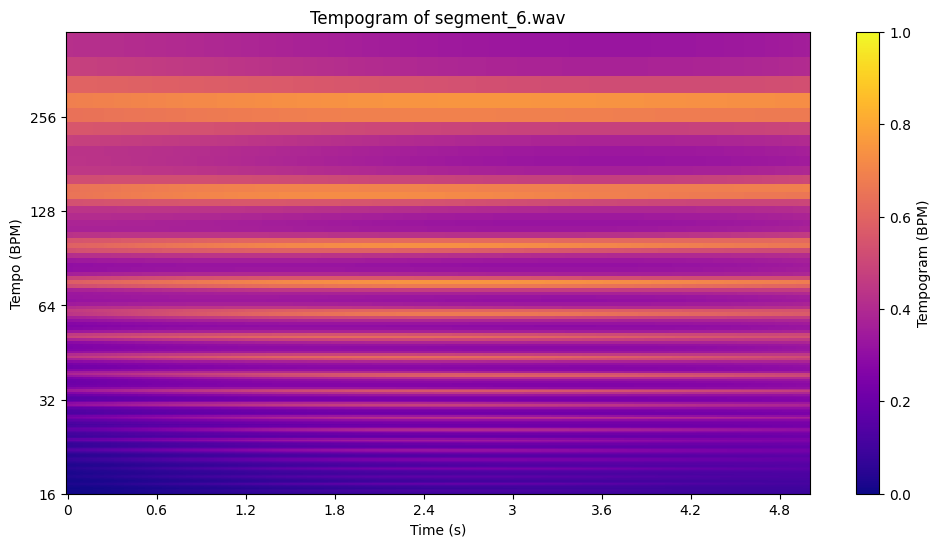

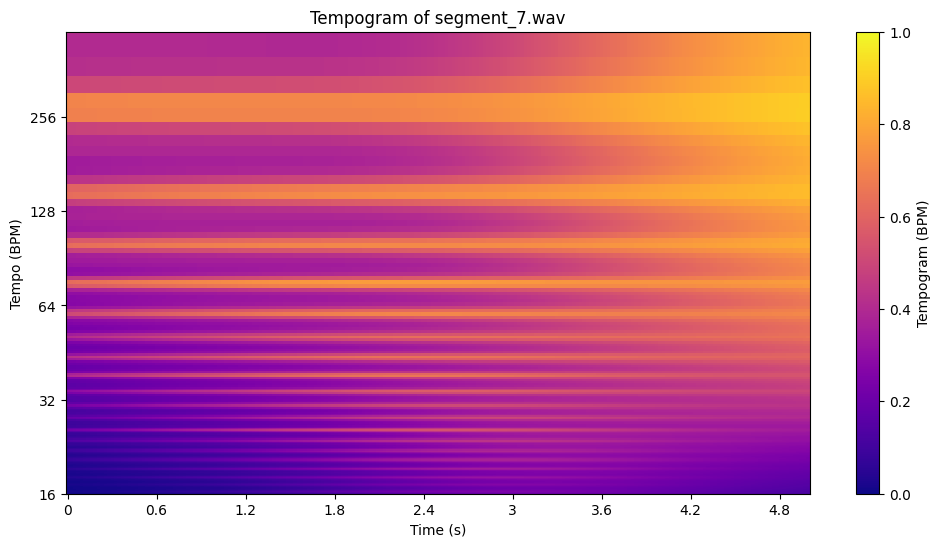

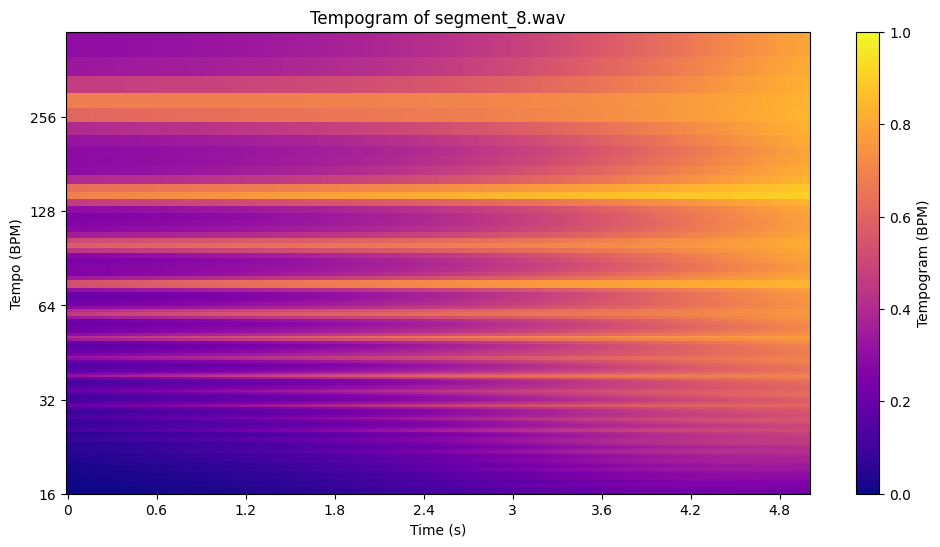

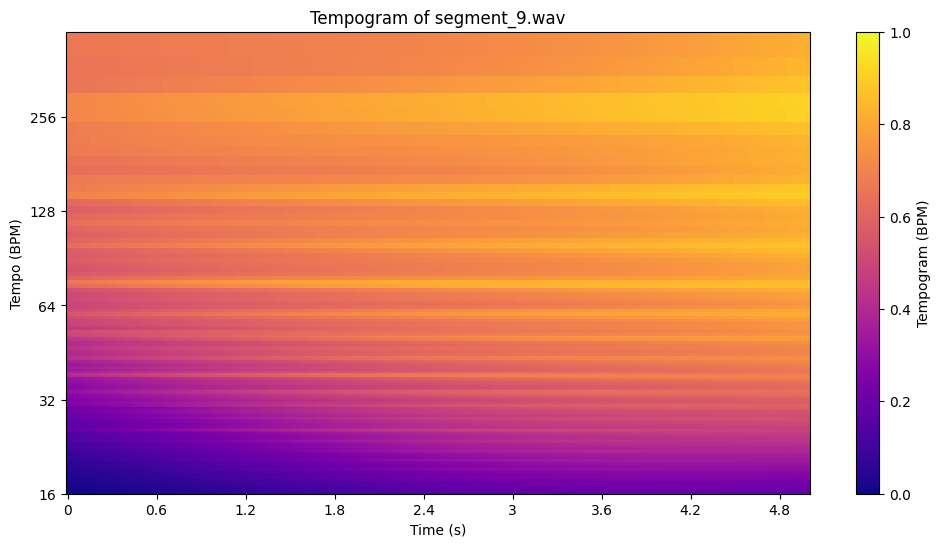

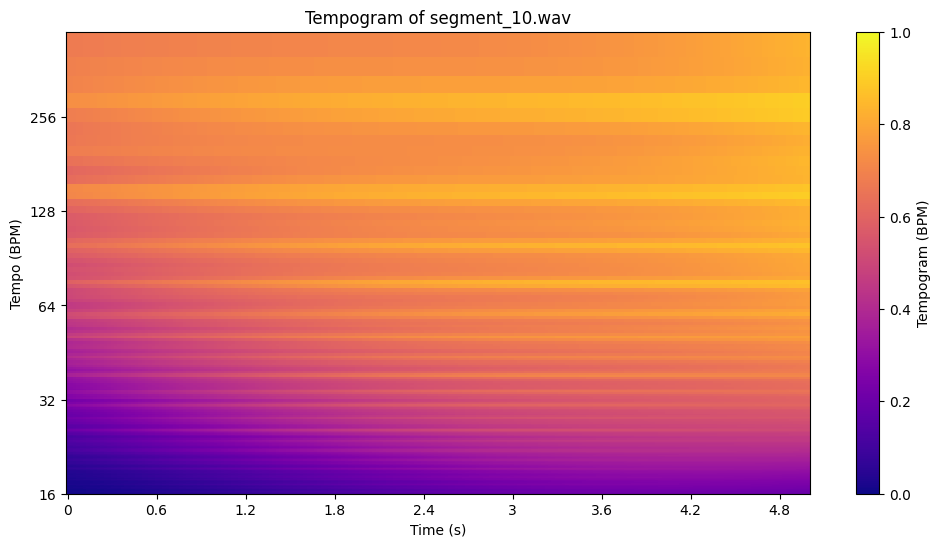

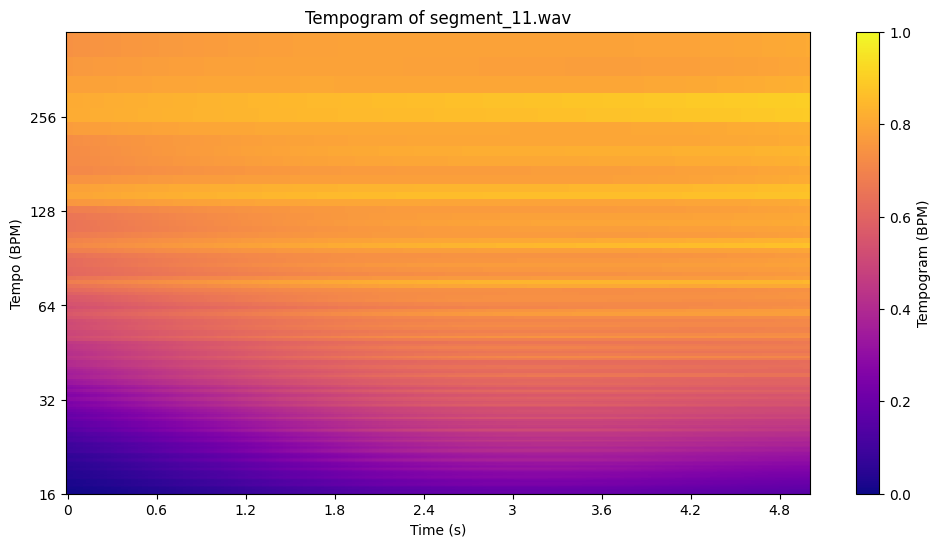

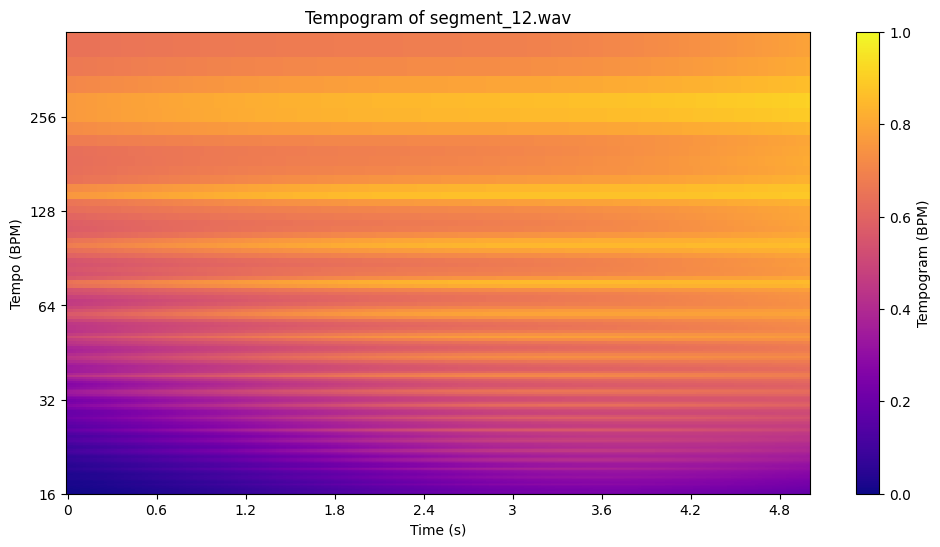

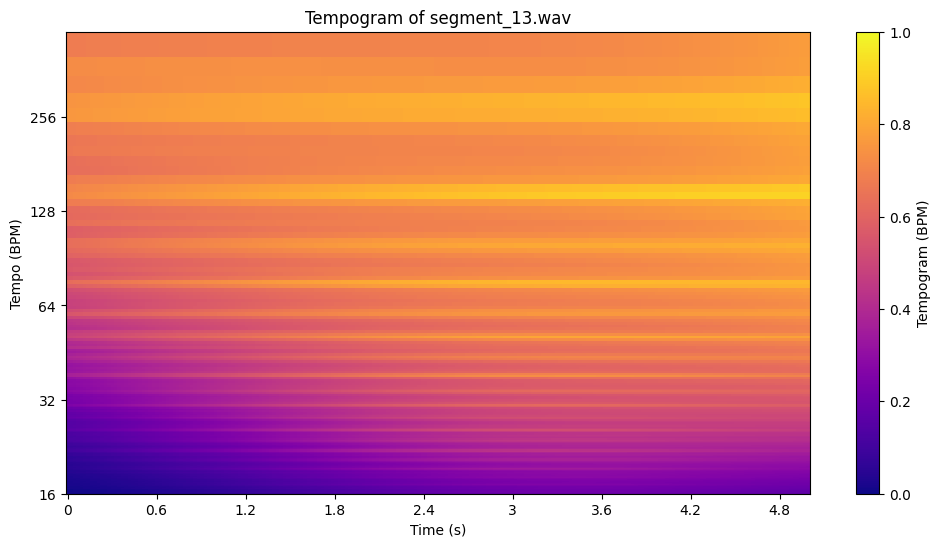

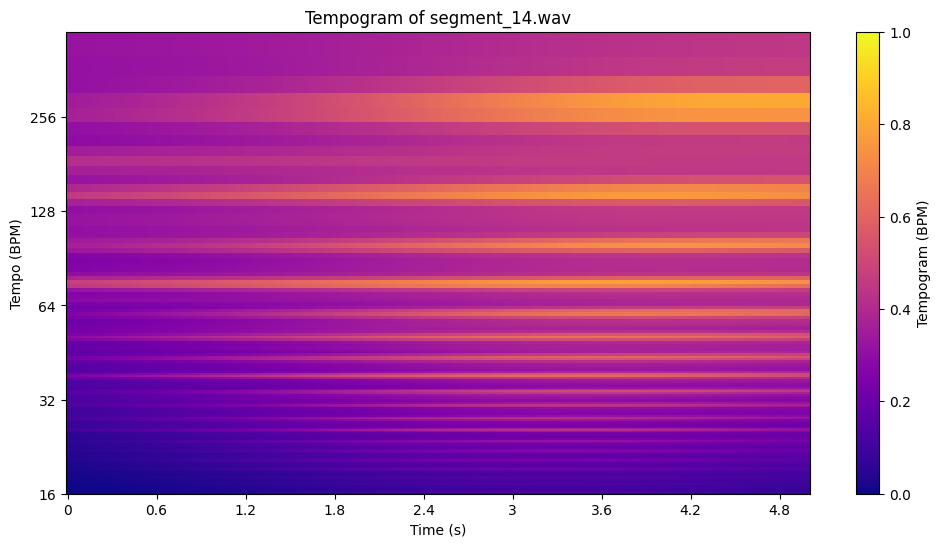

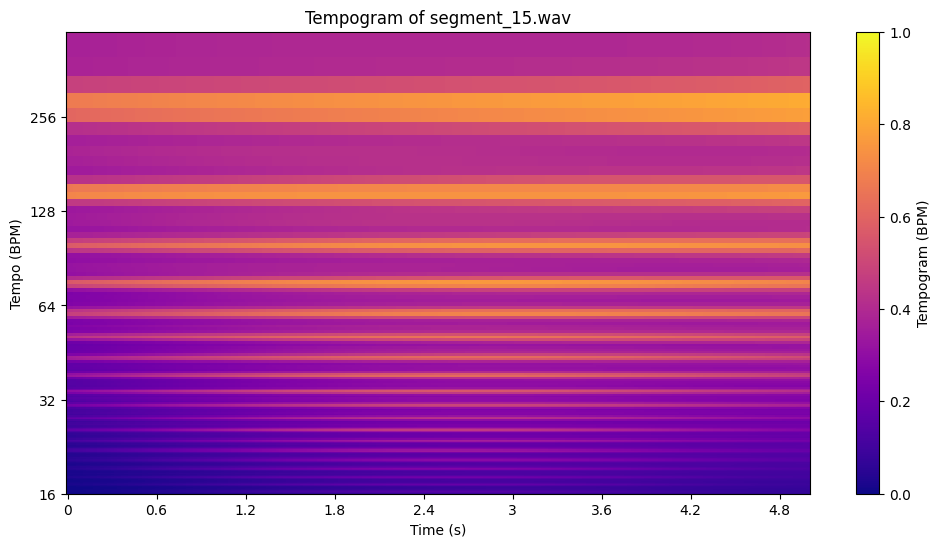

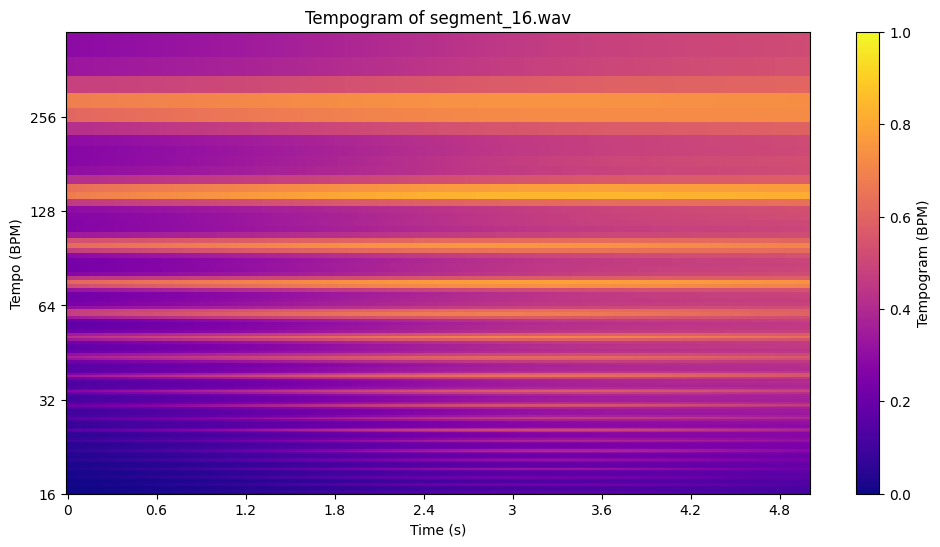

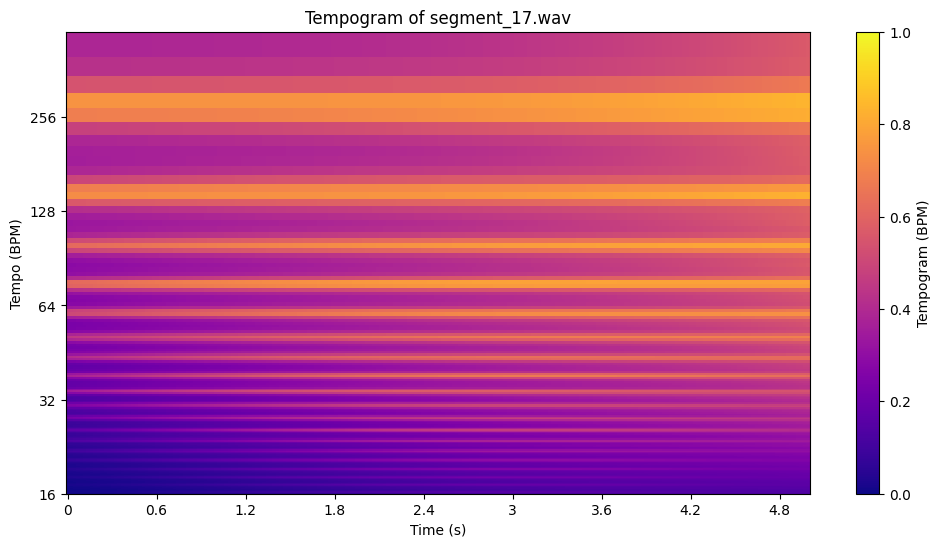

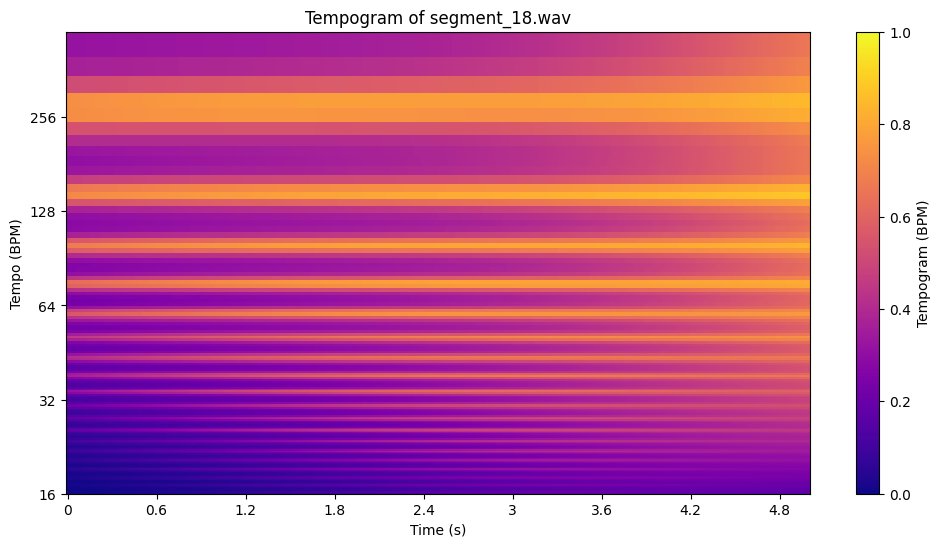

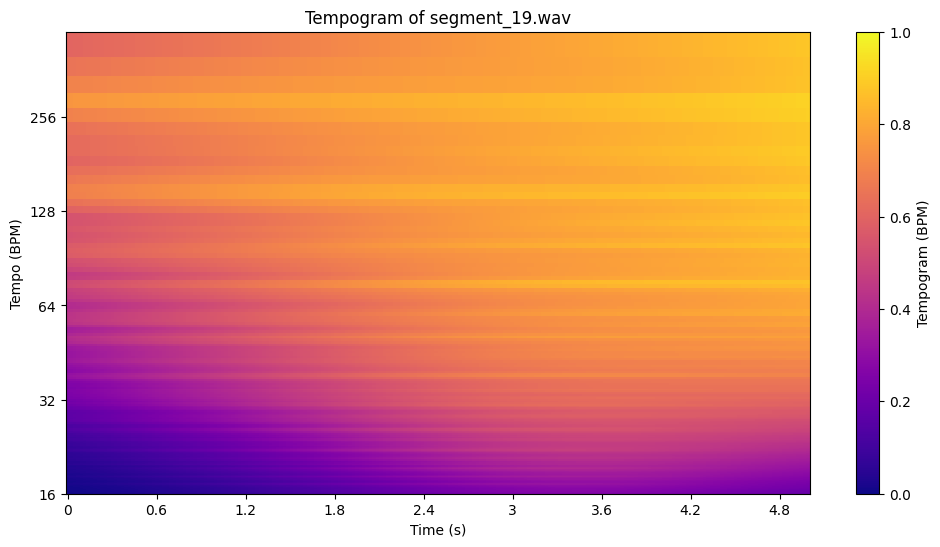

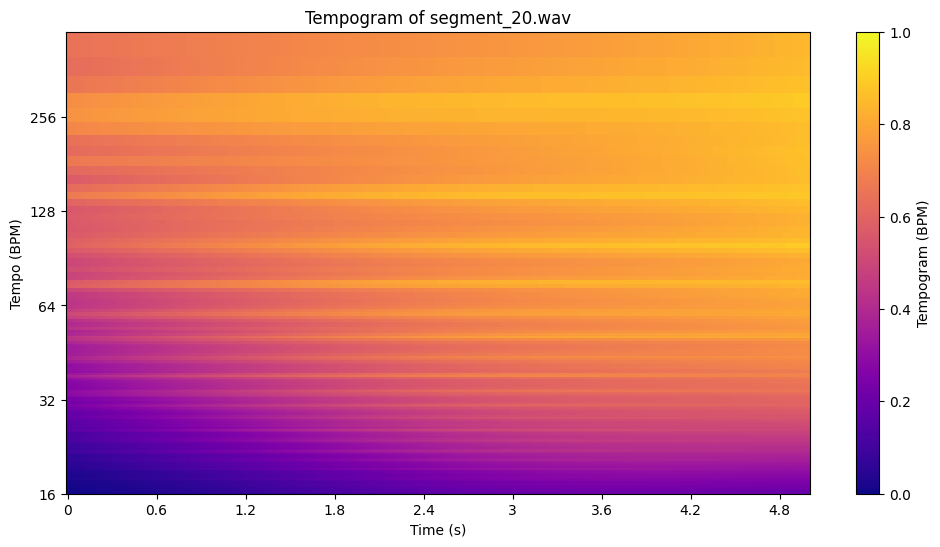

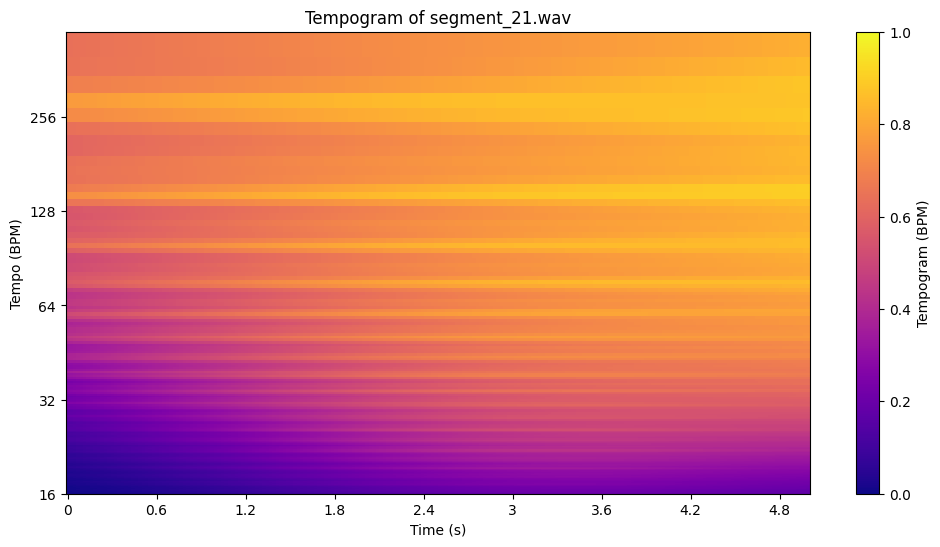

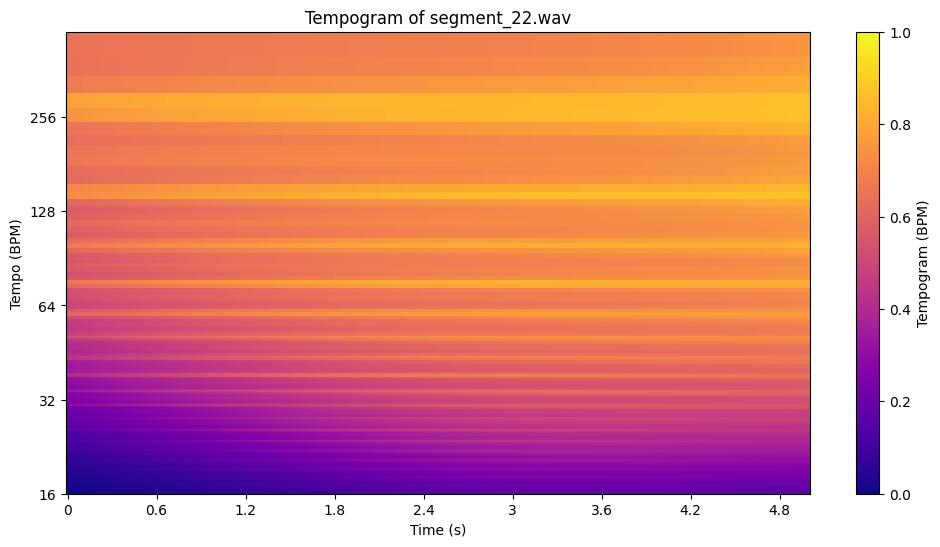

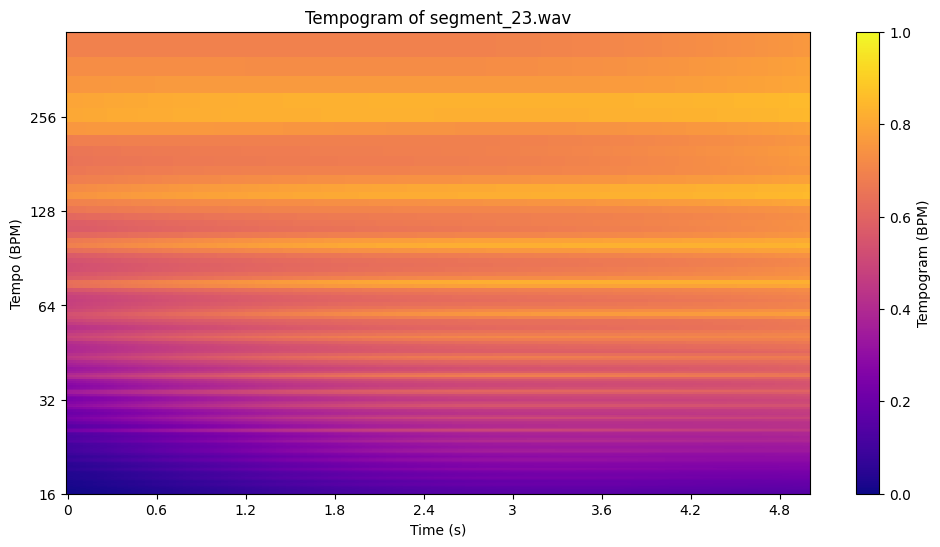

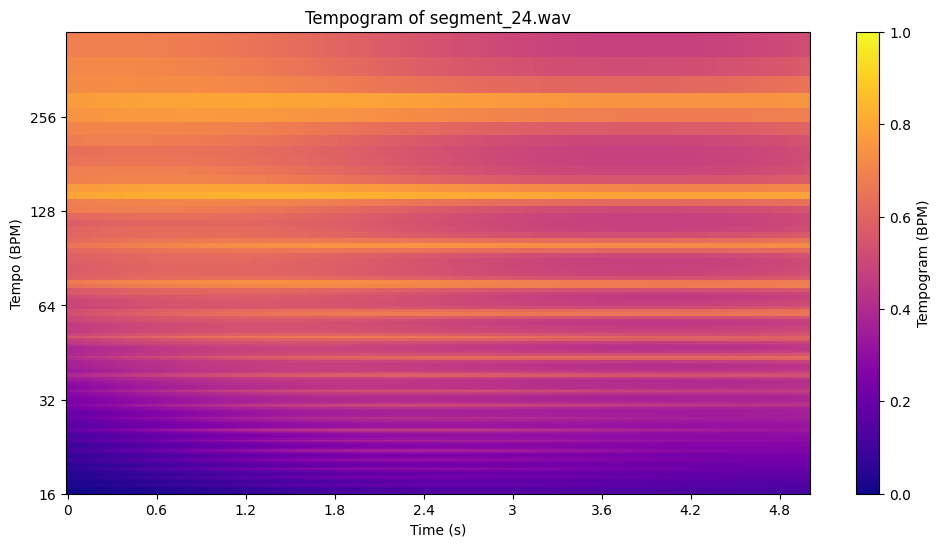

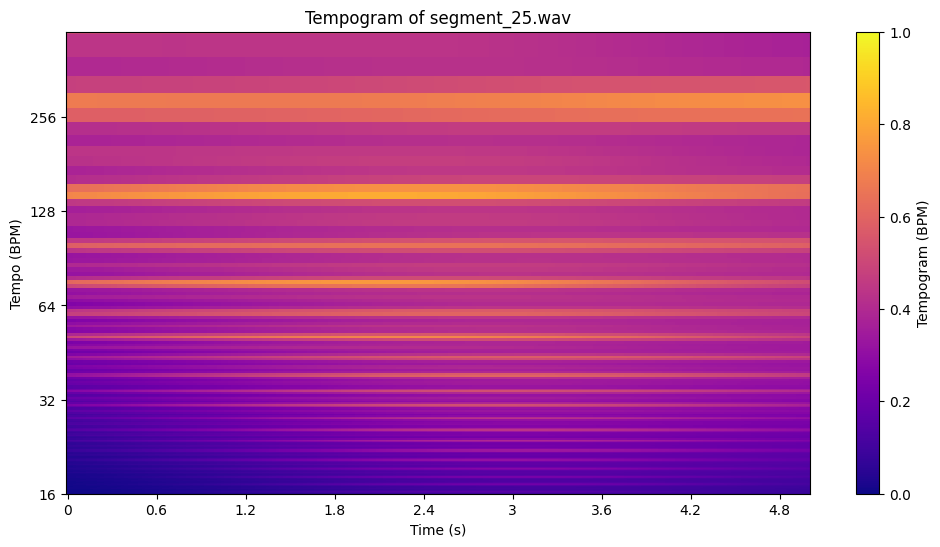

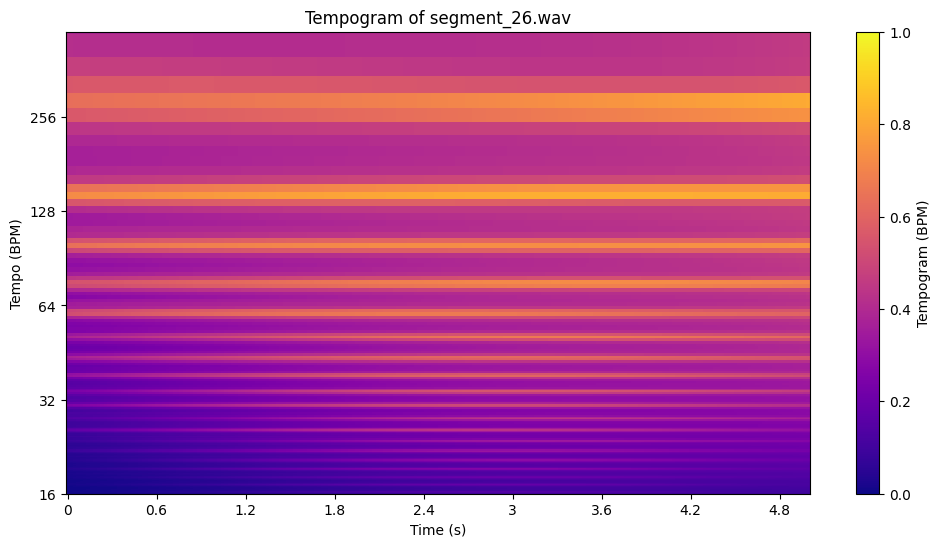

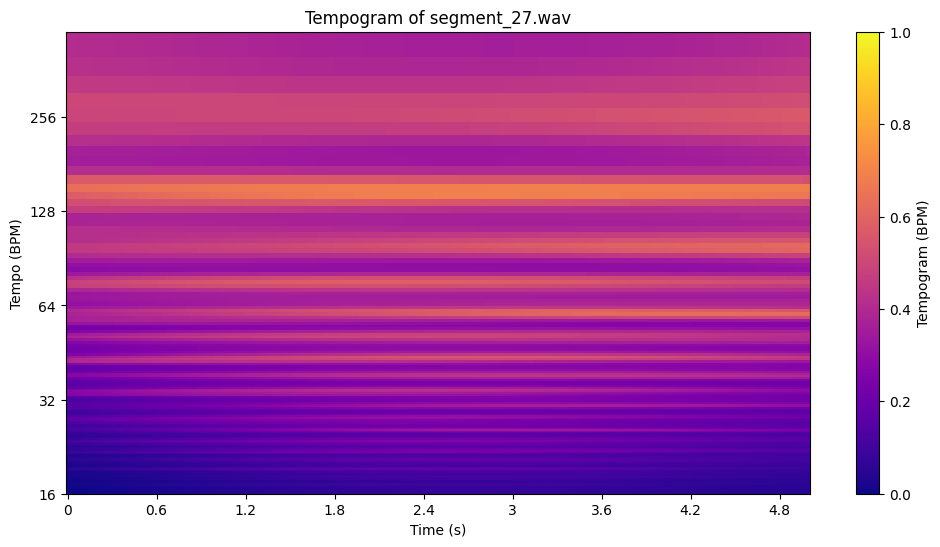

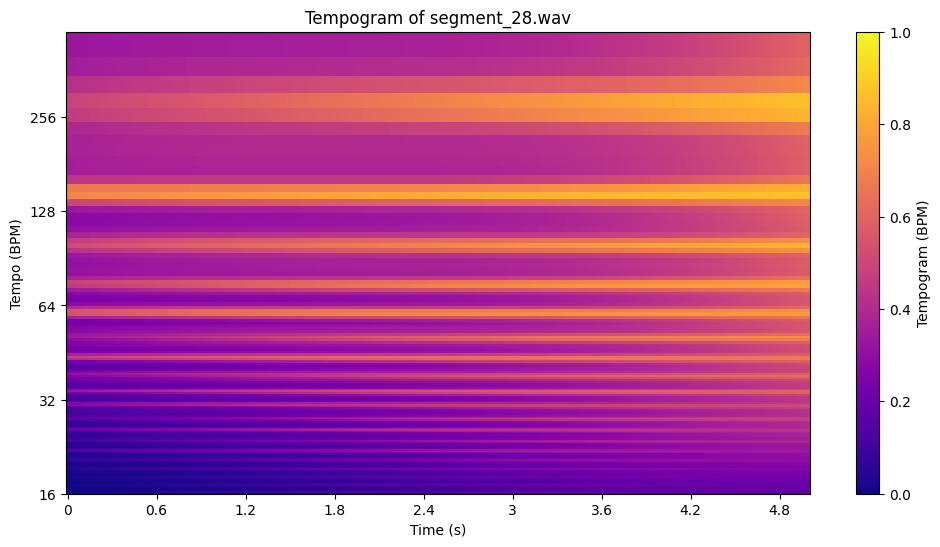

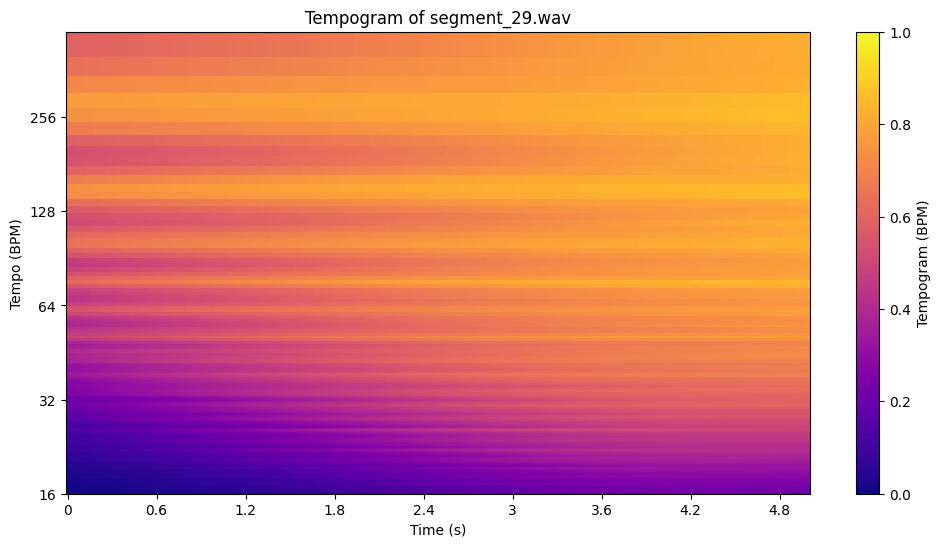

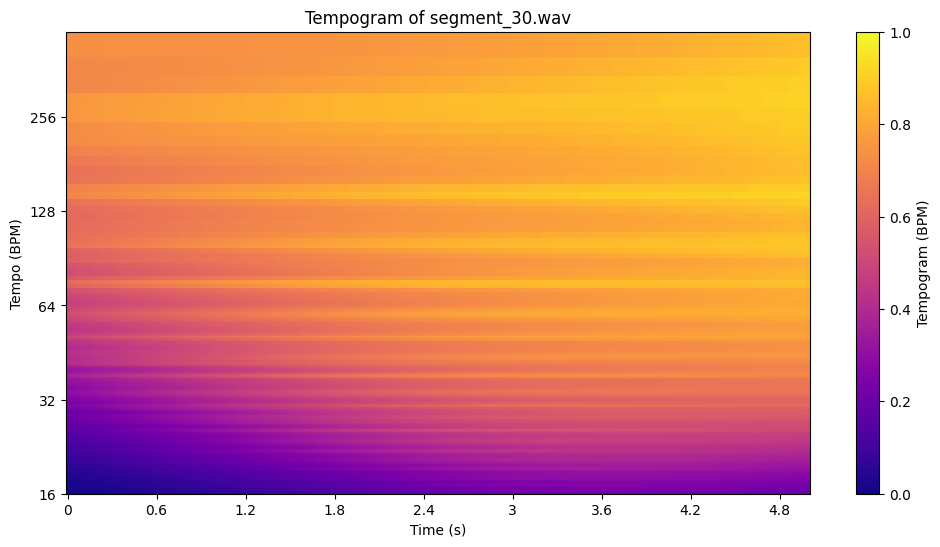

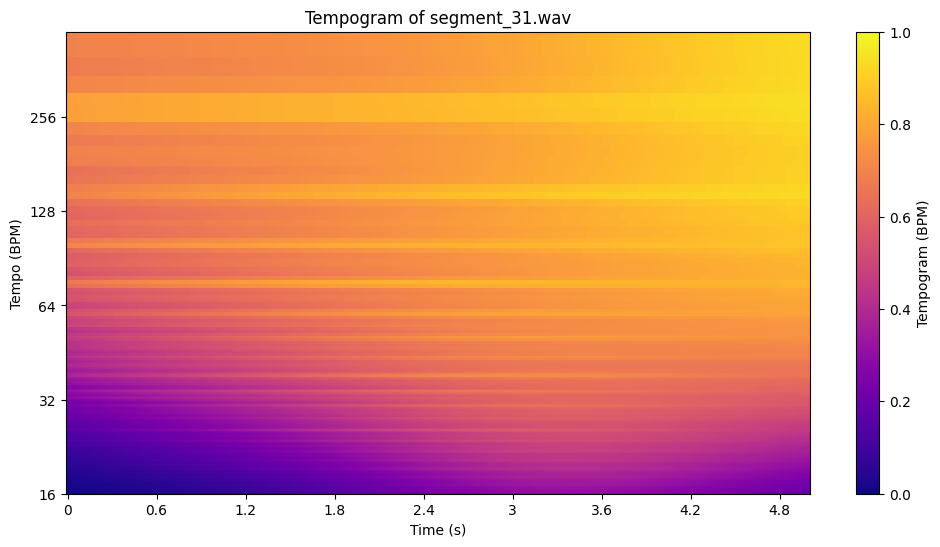

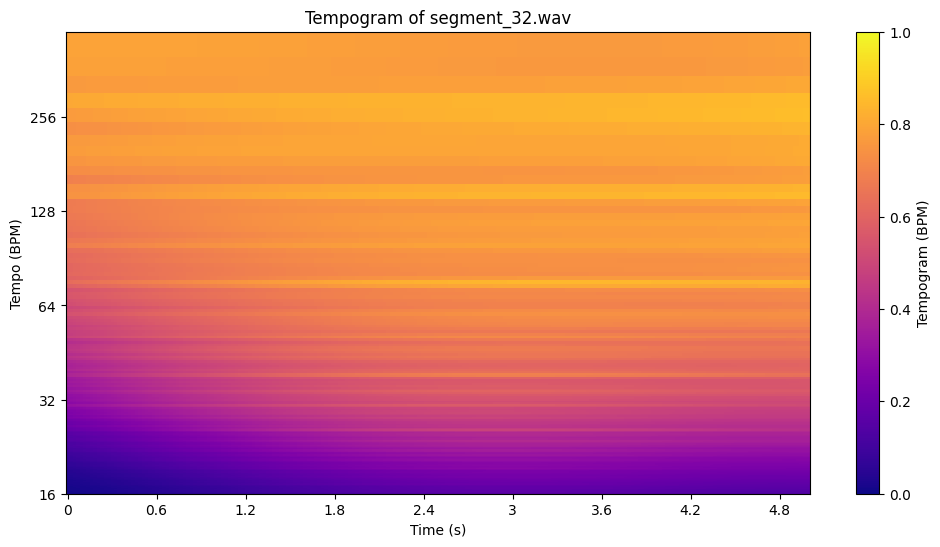

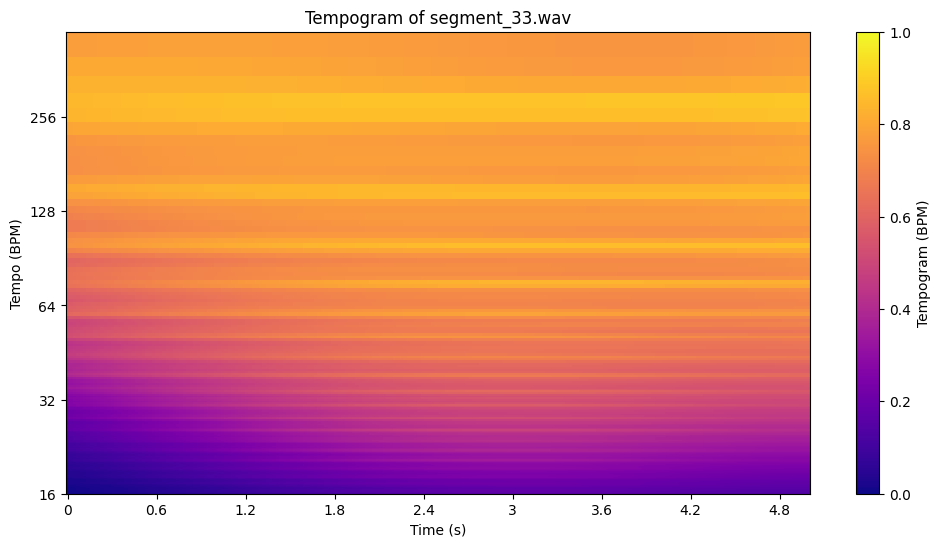

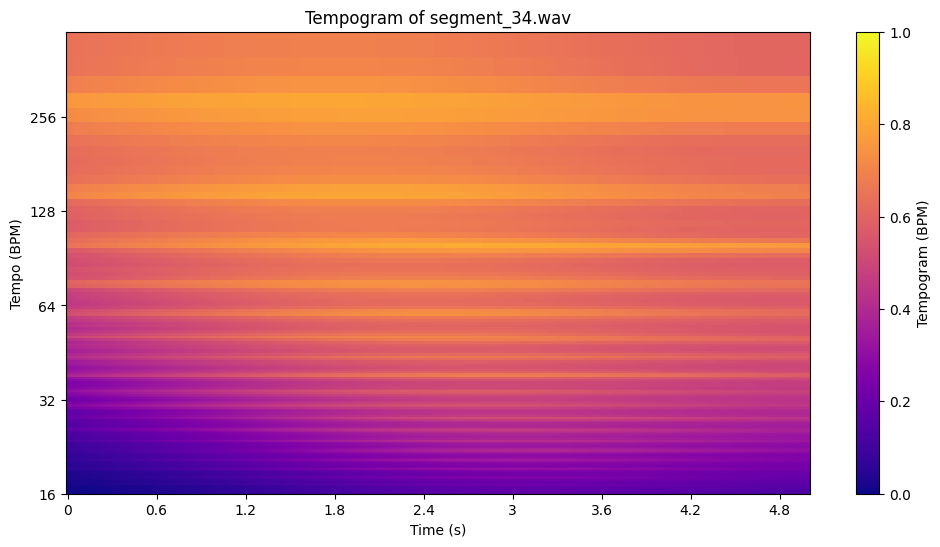

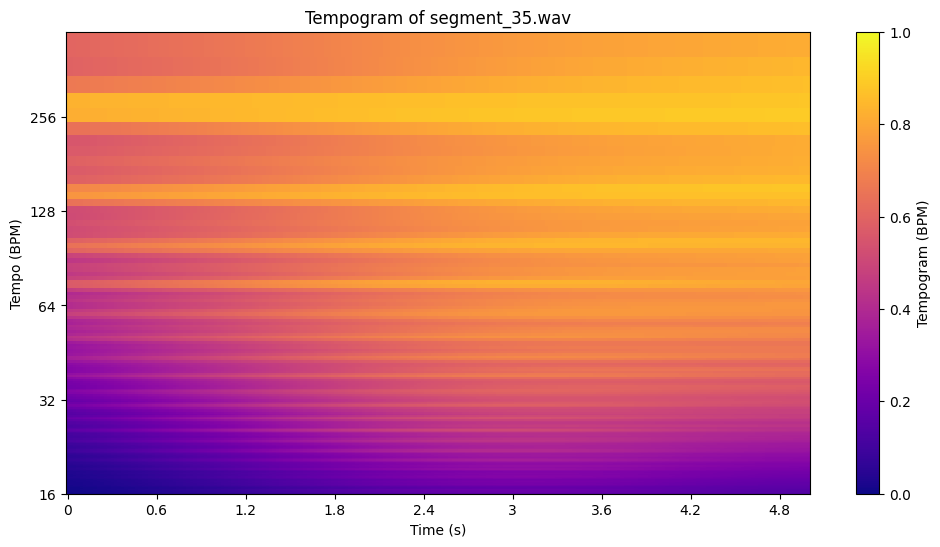

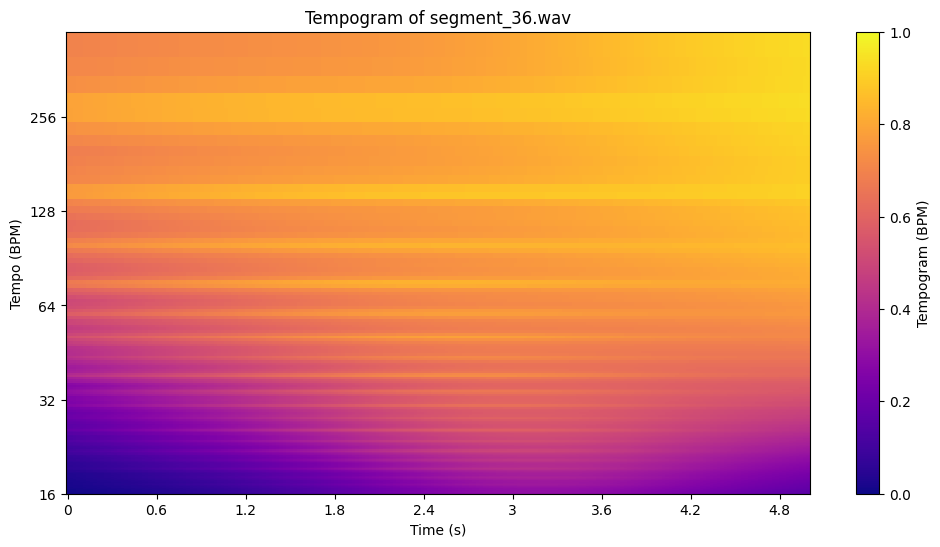

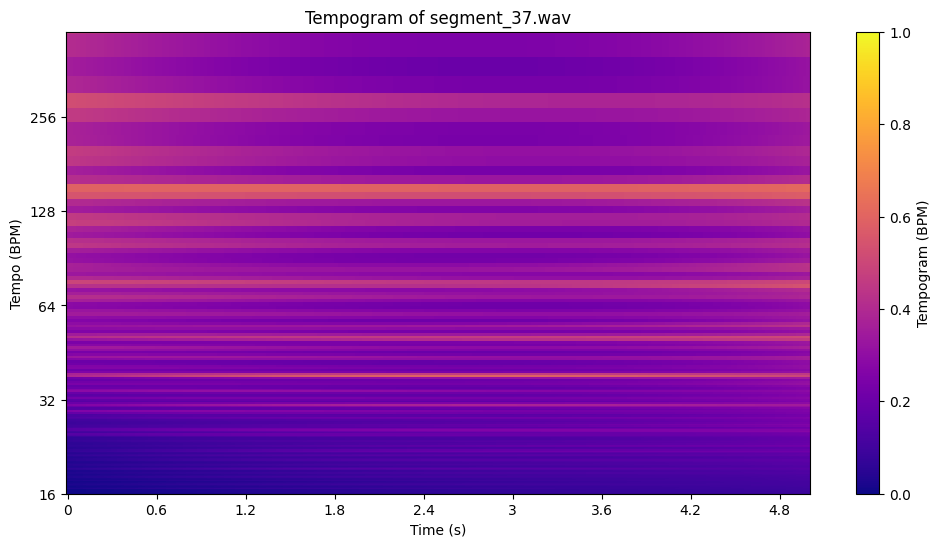

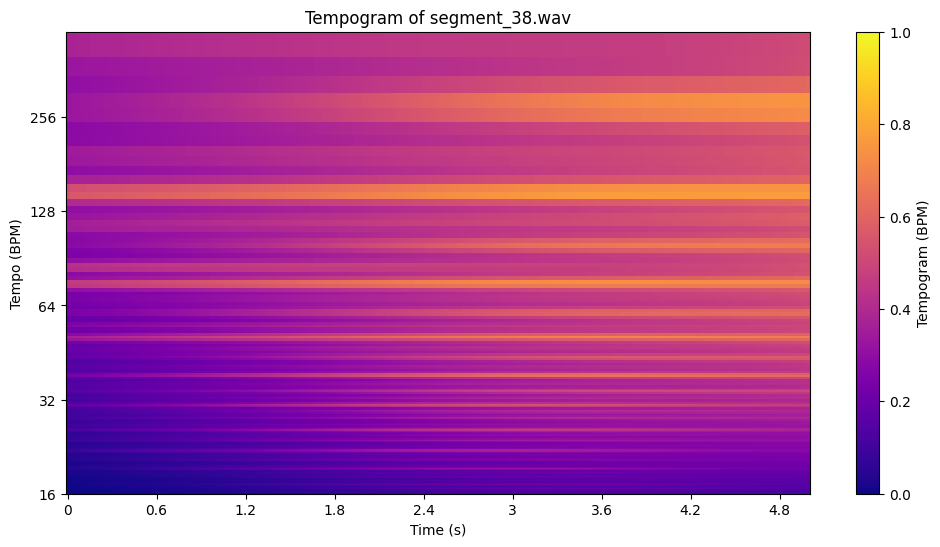

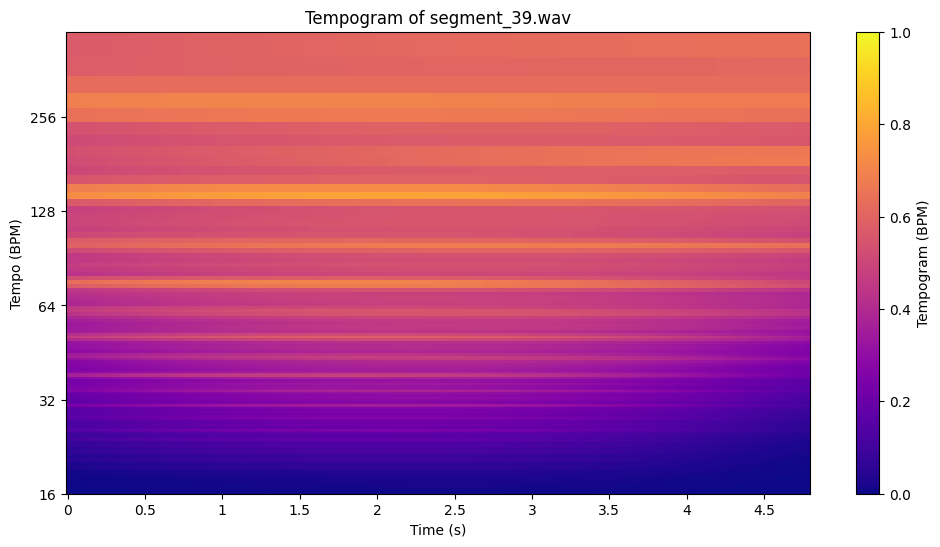

In [20]:
# prompt: '/content/drive/MyDrive/2학기자율/split_audio'에 있는 wav파일들 차례로 tempogram 보여줘

import os
import librosa
import librosa.display
import matplotlib.pyplot as plt

# Define the directory containing the WAV files
audio_dir = "/content/drive/MyDrive/2학기자율/split_audio"

# Iterate through each file in the directory
for filename in os.listdir(audio_dir):
    if filename.endswith(".wav"):
        audio_path = os.path.join(audio_dir, filename)

        try:
            # Load the audio file
            y, sr = librosa.load(audio_path)

            # Calculate tempo and beats
            onset_env = librosa.onset.onset_strength(y=y, sr=sr)
            tempo, beats = librosa.beat.beat_track(onset_envelope=onset_env, sr=sr)

            # Calculate tempogram
            tempogram = librosa.feature.tempogram(onset_envelope=onset_env, sr=sr)

            # Display the tempogram
            # cmap = coolwarm, viridis, plasma, inferno, magma
            plt.figure(figsize=(12, 6))
            librosa.display.specshow(tempogram, sr=sr, x_axis='time', y_axis='tempo', cmap='plasma')
            plt.colorbar(label='Tempogram (BPM)')
            plt.title(f'Tempogram of {filename}')
            plt.xlabel('Time (s)')
            plt.ylabel('Tempo (BPM)')
            plt.show()

        except Exception as e:
            print(f"Error processing {filename}: {e}")

In [ ]:
import librosa
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Load the audio file
# audio_path = '/content/drive/MyDrive/2학기자율/태양물고기-6-윤하.mp3'
y, sr = librosa.load(audio_path)

# Calculate tempo and beats
onset_env = librosa.onset.onset_strength(y=y, sr=sr)
tempo, beats = librosa.beat.beat_track(onset_envelope=onset_env, sr=sr)

# Calculate tempogram
tempogram = librosa.feature.tempogram(onset_envelope=onset_env, sr=sr)

# Convert the tempogram to a Pandas DataFrame for CSV saving
tempogram_df = pd.DataFrame(tempogram)

# Save the tempogram as a CSV file
tempogram_df.to_csv('tempogram.csv', index=False)

# Save the tempogram as a .npy file
np.save('tempogram.npy', tempogram)

print("Tempogram data saved as 'tempogram.csv' and 'tempogram.npy'")


Tempogram data saved as 'tempogram.csv' and 'tempogram.npy'


In [ ]:
# prompt: tempogram.csv 다운받아줘

from google.colab import files

files.download('tempogram.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
tempogram_df.head()

,0,1,2,3,4,5,6,7,8,9,...,9419,9420,9421,9422,9423,9424,9425,9426,9427,9428
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.598944,0.598927,0.598908,0.598888,0.598866,0.598842,0.598816,0.598788,0.598758,0.598725,...,0.805678,0.804760,0.803836,0.802907,0.801972,0.801033,0.800089,0.799140,0.798188,0.797232
2,0.174664,0.174973,0.175282,0.175590,0.175898,0.176206,0.176512,0.176818,0.177124,0.177428,...,0.652184,0.650783,0.649371,0.647950,0.646518,0.645077,0.643627,0.642169,0.640703,0.639229
3,0.078635,0.079043,0.079452,0.079864,0.080276,0.080691,0.081108,0.081526,0.081946,0.082367,...,0.713114,0.712601,0.712080,0.711549,0.711009,0.710460,0.709902,0.709337,0.708763,0.708181
4,0.080976,0.081418,0.081861,0.082306,0.082753,0.083201,0.083651,0.084103,0.084556,0.085011,...,0.769148,0.769525,0.769896,0.770261,0.770621,0.770974,0.771322,0.771664,0.772000,0.772330


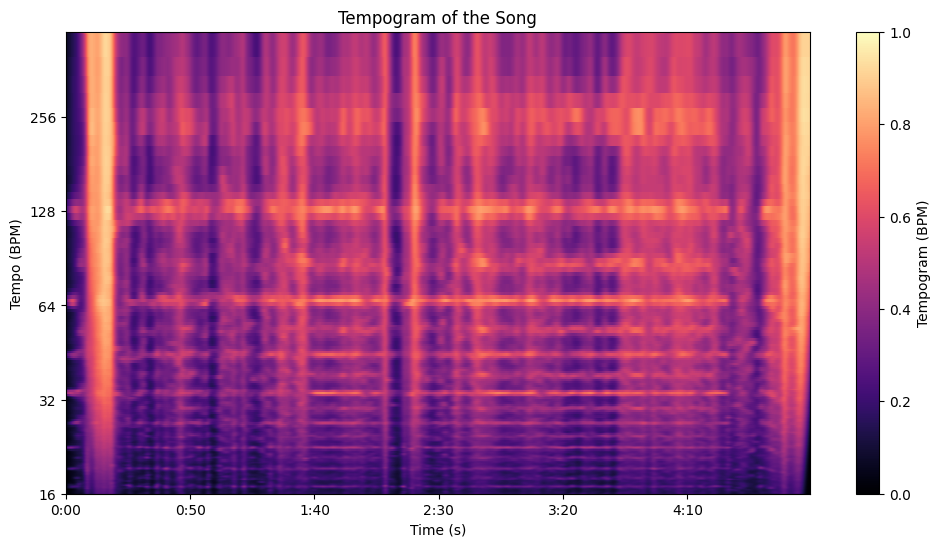

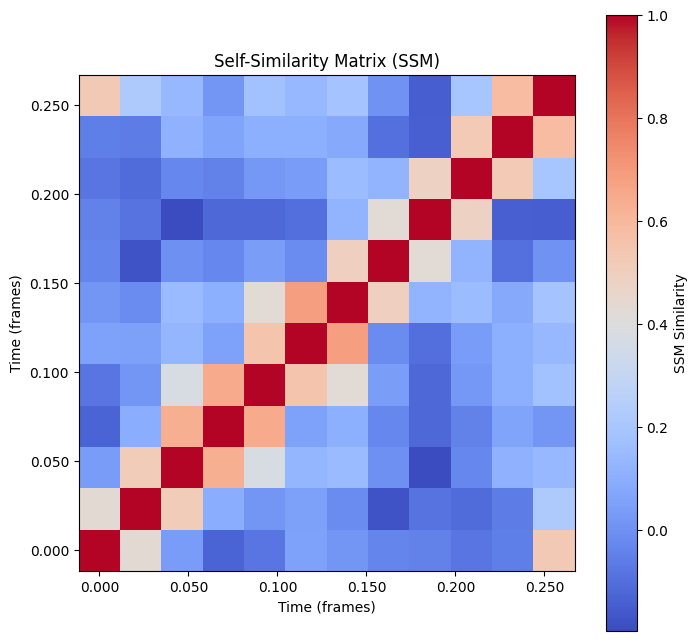

In [ ]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt

# 오디오 파일 로드
audio_path = '/content/drive/MyDrive/2학기자율/체념-5-빅마마.mp3'  # 파일 경로를 지정하세요
y, sr = librosa.load(audio_path)

# 1. Tempogram 계산
# Tempogram은 시간에 따른 템포 변화를 시각화합니다.
onset_env = librosa.onset.onset_strength(y=y, sr=sr)
tempogram = librosa.feature.tempogram(onset_envelope=onset_env, sr=sr)

# Tempogram 시각화
plt.figure(figsize=(12, 6))
librosa.display.specshow(tempogram, sr=sr, x_axis='time', y_axis='tempo', cmap='magma')
plt.colorbar(label='Tempogram (BPM)')
plt.title('Tempogram of the Song')
plt.xlabel('Time (s)')
plt.ylabel('Tempo (BPM)')
plt.show()

# 2. Self-Similarity Matrix (SSM) 계산
# 크로마 피처를 통해 각 구간 간의 유사성을 측정합니다.
chroma = librosa.feature.chroma_stft(y=y, sr=sr)
chroma_sync = librosa.util.sync(chroma, librosa.beat.beat_track(y=y, sr=sr)[1])
ssm = np.corrcoef(chroma_sync)

# Self-Similarity Matrix (SSM) 시각화
plt.figure(figsize=(8, 8))
librosa.display.specshow(ssm, x_axis='time', y_axis='time', cmap='coolwarm')
plt.colorbar(label='SSM Similarity')
plt.title('Self-Similarity Matrix (SSM)')
plt.xlabel('Time (frames)')
plt.ylabel('Time (frames)')
plt.show()


In [ ]:
import librosa
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models

# 1. 기본적인 템포와 피치 분석 (librosa 사용)
def basic_analysis(file_path):
    y, sr = librosa.load(file_path)

    # 템포 추정
    tempo, _ = librosa.beat.beat_track(y=y, sr=sr)

    # 피치 추정
    pitches, magnitudes = librosa.piptrack(y=y, sr=sr)
    pitch_values = pitches[magnitudes > np.max(magnitudes) / 2]

    # NaN 값 처리 및 평균 피치 계산
    if pitch_values.size == 0:
        pitch = 0.0
    else:
        pitch = float(np.nanmean(pitch_values))  # NaN 제외한 평균 피치, float으로 변환

    return float(tempo), float(pitch)  # 두 값 모두 명시적으로 float으로 변환

# 2. CNN 모델 정의 (입력 크기를 고정하지 않음)
def create_cnn_model(input_shape):
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.GlobalAveragePooling2D(),  # Flatten 대신 GlobalAveragePooling2D 사용
        layers.Dense(64, activation='relu'),
        layers.Dense(2)  # 템포와 피치를 위한 2개의 출력
    ])
    model.compile(optimizer='adam', loss='mse')
    return model

# 3. 스펙트로그램 생성 및 전처리
def preprocess_audio(file_path):
    y, sr = librosa.load(file_path)
    S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
    S_dB = librosa.power_to_db(S, ref=np.max)
    return np.expand_dims(S_dB, axis=-1)

# 4. 메인 함수
def analyze_music(file_path):
    # 기본 분석
    basic_tempo, basic_pitch = basic_analysis(file_path)

    print(f"Basic Analysis - Tempo: {basic_tempo:.2f} BPM, Pitch: {basic_pitch:.2f} Hz")

    # 오디오 전처리
    input_data = preprocess_audio(file_path)
    input_shape = input_data.shape[1:]  # (128, time, 1)

    # CNN 모델 생성 (입력 크기에 맞게 조정)
    model = create_cnn_model(input_shape)

    # 배치 차원 추가
    input_data = np.expand_dims(input_data, axis=0)

    # CNN 모델을 사용한 예측
    predictions = model.predict(input_data)
    cnn_tempo, cnn_pitch = predictions[0]

    print(f"CNN Analysis - Tempo: {cnn_tempo:.2f} BPM, Pitch: {cnn_pitch:.2f} Hz")

# 사용 예시
file_path = "/content/drive/MyDrive/2학기자율/태양물고기-6-윤하.mp3"
analyze_music(file_path)

<ipython-input-13-656f5f8c1384>:23: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return float(tempo), float(pitch)  # 두 값 모두 명시적으로 float으로 변환


Basic Analysis - Tempo: 95.70 BPM, Pitch: 318.78 Hz


ValueError: Input 0 of layer "conv2d_6" is incompatible with the layer: expected min_ndim=4, found ndim=3. Full shape received: (None, 9429, 1)

In [ ]:
import librosa
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models

# 1. 기본적인 템포와 피치 분석 (librosa 사용)
def basic_analysis(file_path):
    y, sr = librosa.load(file_path)

    # 템포 추정
    tempo, _ = librosa.beat.beat_track(y=y, sr=sr)

    # 피치 추정
    pitches, magnitudes = librosa.piptrack(y=y, sr=sr)
    pitch_values = pitches[magnitudes > np.max(magnitudes) / 2]

    # NaN 값 처리 및 평균 피치 계산
    if pitch_values.size == 0:
        pitch = 0.0
    else:
        pitch = np.nanmean(pitch_values)  # NaN 제외한 평균 피치

    return float(tempo), float(pitch)  # float로 명시적 변환

# 2. CNN 모델 정의
def create_cnn_model(input_shape):
    model = models.Sequential([
        layers.Input(shape=input_shape),
        layers.Conv2D(32, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.GlobalAveragePooling2D(),
        layers.Dense(64, activation='relu'),
        layers.Dense(2)  # 템포와 피치를 위한 2개의 출력
    ])
    model.compile(optimizer='adam', loss='mse')
    return model

# 3. 스펙트로그램 생성 및 전처리
def preprocess_audio(file_path, max_length=1000):
    y, sr = librosa.load(file_path)
    S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
    S_dB = librosa.power_to_db(S, ref=np.max)

    # 패딩 또는 잘라내기
    if S_dB.shape[1] > max_length:
        S_dB = S_dB[:, :max_length]
    else:
        pad_width = ((0, 0), (0, max_length - S_dB.shape[1]))
        S_dB = np.pad(S_dB, pad_width, mode='constant')

    return np.expand_dims(S_dB, axis=-1)

# 4. 메인 함수
def analyze_music(file_path):
    # 기본 분석
    basic_tempo, basic_pitch = basic_analysis(file_path)

    print(f"Basic Analysis - Tempo: {basic_tempo:.2f} BPM, Pitch: {basic_pitch:.2f} Hz")

    # 오디오 전처리
    input_data = preprocess_audio(file_path)
    input_shape = input_data.shape

    # CNN 모델 생성
    model = create_cnn_model(input_shape)

    # 배치 차원 추가
    input_data = np.expand_dims(input_data, axis=0)

    # CNN 모델을 사용한 예측
    predictions = model.predict(input_data)
    cnn_tempo, cnn_pitch = predictions[0]

    print(f"CNN Analysis - Tempo: {cnn_tempo:.2f} BPM, Pitch: {cnn_pitch:.2f} Hz")

# 사용 예시
file_path = "/content/drive/MyDrive/2학기자율/태양물고기-6-윤하.mp3"
analyze_music(file_path)

<ipython-input-6-882eed47e418>:23: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return float(tempo), float(pitch)  # float로 명시적 변환


Basic Analysis - Tempo: 95.70 BPM, Pitch: 318.78 Hz
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 339ms/step
CNN Analysis - Tempo: 4.39 BPM, Pitch: -1.13 Hz


In [ ]:
pip install fastdtw


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 3.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for fastdtw: filename=fastdtw-0.3.4-cp310-cp310-linux_x86_64.whl size=512548 sha256=61205f36f30ec8ac5a720e73c3c347b9721b0566a67380e175058483069356b9
  Stored in directory: /root/.cache/pip/wheels/73/c8/f7/c25448dab74c3acf4848bc25d513c736bb93910277e1528ef4
Successfully built fastdtw


In [ ]:
import numpy as np
from scipy.spatial.distance import euclidean
from fastdtw import fastdtw

# 두 시계열 데이터 생성 (1차원 배열)
x = np.array([1, 2, 3, 4, 2, 1]).flatten()
y = np.array([1, 1, 2, 3, 4, 4, 2, 1]).flatten()

# 1차원 배열 확인
print("Shape of x:", x.shape)
print("Shape of y:", y.shape)

# Dynamic Time Warping 계산
distance, path = fastdtw(x, y, dist=euclidean)

# 결과 출력
print("DTW Distance:", distance)
print("Warping Path:", path)

# 시각화 (선택사항)
import matplotlib.pyplot as plt

# DTW 매칭 경로 시각화
plt.plot(x, label='x')
plt.plot(y, label='y')
for (i, j) in path:
    plt.plot([i, j], [x[i], y[j]], 'k-')
plt.legend()
plt.xlabel('Time Index')
plt.ylabel('Value')
plt.title('Dynamic Time Warping')
plt.show()


Shape of x: (6,)
Shape of y: (8,)


ValueError: Input vector should be 1-D.

# librosa - waveshow

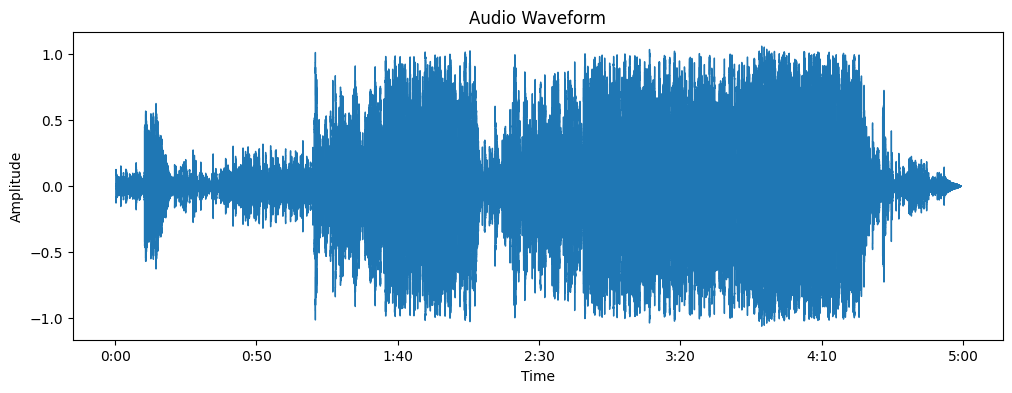

In [ ]:
import librosa
import librosa.display
import matplotlib.pyplot as plt

# 오디오 파일 로드
# y, sr = librosa.load('audio_file.wav')
# audio_path = '/content/drive/MyDrive/2학기자율/혜성-1-윤하.mp3'
audio_path = '/content/drive/MyDrive/2학기자율/체념-5-빅마마.mp3'
y, sr = librosa.load(audio_path)

# 파형 시각화
plt.figure(figsize=(12, 4))
librosa.display.waveshow(y, sr=sr)
plt.title('Audio Waveform')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.show()

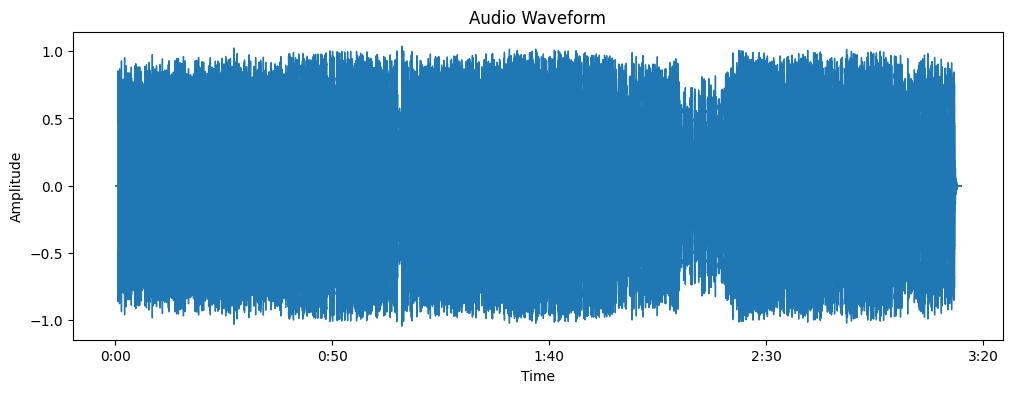

In [ ]:
import librosa
import librosa.display
import matplotlib.pyplot as plt

# 오디오 파일 로드
# y, sr = librosa.load('audio_file.wav')

# 파형 시각화
plt.figure(figsize=(12, 4))
librosa.display.waveshow(y, sr=sr)
plt.title('Audio Waveform')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.show()

# librosa pitch

In [ ]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

# 오디오 파일 불러오기
# audio_path = 'example_audio.wav'
# audio_path = '/content/drive/MyDrive/2학기자율/혜성-1-윤하.mp3'
audio_path = '/content/drive/MyDrive/2학기자율/체념-5-빅마마.mp3'

y, sr = librosa.load(audio_path, sr=None)

# 피치 추정 (librosa.pyin)
fmin = librosa.note_to_hz('C2')  # 최저 음
fmax = librosa.note_to_hz('C7')  # 최고 음
pitches = librosa.pyin(y, fmin=fmin, fmax=fmax, sr=sr)

# 시간 축 생성 (오디오 길이와 일치)
times = librosa.times_like(pitches, sr=sr)

# 피치 시각화
plt.figure(figsize=(10, 4))
plt.plot(times, pitches, label='Pitch (Hz)', color='b')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.title('Pitch Estimation over Time')
plt.legend(loc='upper right')
plt.show()


AttributeError: 'tuple' object has no attribute 'shape'

# ACR CLOUD 노래인식

In [ ]:
!pip install acrcloud


In [ ]:
import json
import hashlib
import hmac
import time
import requests
import base64

# ACRCloud 설정
# acrcloud_access_key = '7f725693025ccedc19f6bd4048180bc0'
# acrcloud_access_secret = 'bfnMWQToGrvWhui7byAAD2L2q3FgNYroFgXEpnCT'
# acrcloud_recognize_url = 'http://identify-eu-west-1.acrcloud.com/v1/identify'

# file_path = '/content/drive/MyDrive/2학기자율/혜성-1-윤하_[cut_3sec].mp3'
file_path = '/content/drive/MyDrive/2학기자율/혜성-1-윤하.mp3'
# 오디오 파일 읽기
def read_audio_file(file_path):
    with open(file_path, 'rb') as f:
        return f.read()

# ACRCloud 요청 생성
def create_acrcloud_request(file_data):
    http_method = "POST"
    http_uri = "/v1/identify"
    data_type = "audio"
    signature_version = "1"
    timestamp = str(time.time())

    string_to_sign = "\n".join([http_method, http_uri, acrcloud_access_key, data_type, signature_version, timestamp])
    sign = base64.b64encode(hmac.new(acrcloud_access_secret.encode('utf-8'), string_to_sign.encode('utf-8'), digestmod=hashlib.sha1).digest()).decode('utf-8')

    files = {
        'sample': ('audio_sample', file_data, 'audio/mpeg'),
        'access_key': (None, acrcloud_access_key),
        'data_type': (None, data_type),
        'signature': (None, sign),
        'signature_version': (None, signature_version),
        'timestamp': (None, timestamp)
    }

    response = requests.post(acrcloud_recognize_url, files=files)
    return response.json()

# 오디오 파일에서 음악 인식
def recognize_music(file_path):
    file_data = read_audio_file(file_path)
    response = create_acrcloud_request(file_data)

    # 인식된 결과 출력
    if response.get('status', {}).get('code') == 0:
        metadata = response.get('metadata', {}).get('music', [])[0]
        print(f"곡 제목: {metadata.get('title')}")
        print(f"아티스트: {metadata.get('artists', [{}])[0].get('name')}")
        print(f"앨범: {metadata.get('album', {}).get('name')}")
    else:
        print("음악을 인식하지 못했습니다.")

# 예시 실행
recognize_music(file_path)


음악을 인식하지 못했습니다.


In [12]:
# prompt: audio_path 음악 5초 단위로 잘라서 파일로 저장해줘

import librosa
import soundfile as sf
import os

def split_audio(audio_path, output_dir, duration=5):
    # Load the audio file
    y, sr = librosa.load(audio_path)

    # Calculate the number of segments
    total_duration = librosa.get_duration(y=y, sr=sr)
    num_segments = int(total_duration // duration)

    # Create the output directory if it doesn't exist
    os.makedirs(output_dir, exist_ok=True)

    # Iterate over the segments and save them as separate files
    for i in range(num_segments):
        start = i * duration * sr
        end = (i + 1) * duration * sr
        segment = y[start:end]

        output_file = os.path.join(output_dir, f"segment_{i + 1}.wav")
        sf.write(output_file, segment, sr)

    # Handle any remaining audio
    if total_duration % duration != 0:
      start = num_segments * duration * sr
      segment = y[start:]
      output_file = os.path.join(output_dir, f"segment_{num_segments + 1}.wav")
      sf.write(output_file, segment, sr)

# Example usage
audio_path = "/content/drive/MyDrive/2학기자율/혜성-1-윤하.mp3"  # Replace with your audio file path
output_dir = "/content/drive/MyDrive/2학기자율/split_audio"  # Replace with your desired output directory
split_audio(audio_path, output_dir)